In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from preprocessing import run_feature_engineering_single_df, preprocess_datasets
from sklearn.decomposition import PCA

from sklearn import preprocessing

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

sns.set_theme(
    style="whitegrid",       # Background style ("whitegrid", "darkgrid", etc.)
    palette="deep",          # Default color palette ("deep", "muted", "bright", etc.)
    font="sans-serif",       # Font family
    font_scale=1.1,          # Scale font size slightly
    rc={"figure.figsize": (8, 5)}  # Default figure size
)

C:\Users\abdal\AppData\Local\Temp\ipykernel_223920\2226513190.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset_path = Path("../datasets")

train_identity = pd.read_csv(dataset_path / "train_identity.csv")
train_tx = pd.read_csv(dataset_path / "train_transaction.csv")

test_identity = pd.read_csv(dataset_path / "test_identity.csv")
test_tx = pd.read_csv(dataset_path / "test_transaction.csv")

In [3]:
train_all_cols = pd.merge(train_tx, train_identity, on='TransactionID', how='left')
test_all_cols = pd.merge(train_tx, train_identity, on='TransactionID', how='left')

X =  train_all_cols.drop(columns=['isFraud'])
y = train_all_cols['isFraud']

In [4]:
print(f"X_shape: {X.shape}")

X_shape: (590540, 433)


In [5]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [6]:
print(f"X_train_shape: {X_train.shape}")
print(f"X_val_shape: {X_val.shape}")

X_train_shape: (472432, 433)
X_val_shape: (118108, 433)


In [19]:
fraud_training = X_train[y_train == 1]
non_fraud_training = X_train[y_train == 0]

print(f"fraud_training_shape: {fraud_training.shape}")
print(f"non_fraud_training_shape: {non_fraud_training.shape}")

fraud_training_shape: (16530, 200)
non_fraud_training_shape: (455902, 200)


In [7]:
preprocess_datasets(X_train, X_val)

Dropping columns: ['id_21', 'V111', 'V110', 'id_23', 'id_25', 'V311', 'V119', 'V109', 'V300', 'V107', 'V120', 'V117', 'id_26', 'TransactionDT', 'V118', 'V301', 'V108', 'V286', 'V122', 'V115', 'V112', 'id_22', 'V305', 'id_07', 'C3', 'V123', 'id_08', 'id_24', 'V116', 'id_27', 'V121', 'V114', 'V113']
Train shape: (472432, 400)
Val shape: (118108, 400)


(        TransactionID  TransactionAmt  ProductCD  card1  card2  card3  card4  \
 40809         3027809         100.000          2   6177  399.0  150.0      0   
 285886        3272886          29.990          4   7900  345.0  150.0      2   
 104256        3091256         107.950          4  11690  111.0  150.0      4   
 507860        3494860         241.950          4   2616  327.0  150.0      1   
 196382        3183382         117.000          4  13780  298.0  150.0      4   
 ...               ...             ...        ...    ...    ...    ...    ...   
 324259        3311259          59.000          4  10493  455.0  150.0      2   
 532790        3519790          20.903          0   5595  545.0  185.0      4   
 29747         3016747         400.000          4   9335  373.0  150.0      4   
 573130        3560130          16.354          0   3154  408.0  185.0      2   
 337290        3324290         226.000          4   4446  555.0  150.0      4   
 
         card5  card6  add

In [8]:
print(f"X_train_shape: {X_train.shape}")
print(f"X_val_shape: {X_val.shape}")

X_train_shape: (472432, 433)
X_val_shape: (118108, 433)


In [9]:
CONFIG = {
    'create_transaction_amount_ratios': False,
    'clean_data': True,
    'group_rare_categories': False,
    'encode_categorical_columns': True,
    'fill_missing_values': True,
    'create_time_features': False,
    'drop_unused_columns': False,
    'log_transform_transaction_amt': True,
    'standardize_numeric': True,
    'apply_pca': True,
    'n_pca_components': 200
}

X_train = run_feature_engineering_single_df(X_train, CONFIG)
X_val = run_feature_engineering_single_df(X_val, CONFIG)

🚧 Starting feature engineering pipeline...

✅ Low-information columns dropped
✅ TransactionDT dropped
✅ Data cleaned
✅ Categorical columns encoded
✅ Missing values filled
✅ Log transformation applied to TransactionAmt
✅ Numeric features standardized
✅ Applied PCA, reduced to 200 components, explained variance ratio: 0.9885
🎯 Final shape: (472432, 200)
🚧 Starting feature engineering pipeline...

✅ Low-information columns dropped
✅ TransactionDT dropped
✅ Data cleaned
✅ Categorical columns encoded
✅ Missing values filled
✅ Log transformation applied to TransactionAmt
✅ Numeric features standardized
✅ Applied PCA, reduced to 200 components, explained variance ratio: 0.9892
🎯 Final shape: (118108, 200)


In [10]:
print(f"X_train_shape: {X_train.shape}")
print(f"X_val_shape: {X_val.shape}")

X_train_shape: (472432, 200)
X_val_shape: (118108, 200)


In [11]:
# pca = PCA(n_components=401)
# X_train_pca = pca.fit_transform(X_train)

# var_pct = pca.explained_variance_ratio_ * 100

# print(f"Explained variance ratio: {var_pct}")

In [12]:
# cum_var_pct = np.cumsum(var_pct)
# for i, (pct, cum_pct) in enumerate(zip(var_pct, cum_var_pct), start=1):
#     print(f"PC{i}: {pct:.2f}% — Cumulative: {cum_pct:.2f}%")

In [13]:
# pca = PCA(n_components=200)
# X_train_pca = pca.fit_transform(X_train)
# X_val_pca = pca.transform(X_val)
# X_test_pca = pca.transform(X_test)
# print(f"X_train_pca shape: {X_train_pca.shape}")
# print(f"X_val_pca shape: {X_val_pca.shape}")
# print(f"X_test_pca shape: {X_test_pca.shape}")

In [14]:
# def feature_engineering(X_train, X_test, X_val, null_threshold=0.96, unique_val_threshold=0.96, 
#                        drop_transaction_dt=True, fill_na_value=-999, verbose=True):
#     """
#     Performs feature engineering on the training and test datasets.
#     """
#     # Create copies to avoid modifying the original dataframes
#     X_train_processed = X_train.copy()
#     X_test_processed = X_test.copy()
#     X_val_processed = X_val.copy()
    
#     # Find columns with too many null values
#     many_null_cols = [col for col in X_train_processed.columns 
#                       if X_train_processed[col].isnull().sum() / X_train_processed.shape[0] > null_threshold]
#     many_null_cols_X_test = [col for col in X_test_processed.columns 
#                             if X_test_processed[col].isnull().sum() / X_test_processed.shape[0] > null_threshold]
#     many_null_cols_X_val = [col for col in X_val_processed.columns 
#                             if X_val_processed[col].isnull().sum() / X_val_processed.shape[0] > null_threshold]
    
#     # Find columns with a dominant value
#     big_top_value_cols = [col for col in X_train_processed.columns 
#                          if X_train_processed[col].value_counts(dropna=False, normalize=True).values[0] > unique_val_threshold]
#     big_top_value_cols_X_test = [col for col in X_test_processed.columns 
#                                if X_test_processed[col].value_counts(dropna=False, normalize=True).values[0] > unique_val_threshold]
#     big_top_value_cols_X_val = [col for col in X_val_processed.columns
#                                  if X_val_processed[col].value_counts(dropna=False, normalize=True).values[0] > unique_val_threshold]
    
#     # Combine all columns to drop
#     cols_to_drop = list(set(many_null_cols + many_null_cols_X_test + many_null_cols_X_val + 
#                             big_top_value_cols + big_top_value_cols_X_test + big_top_value_cols_X_val))
    
#     if verbose:
#         print(f"Dropping {len(cols_to_drop)} low-information columns")
#         print(cols_to_drop)
    
#     # Drop low-information columns
#     X_train_processed = X_train_processed.drop(cols_to_drop, axis=1)
#     X_test_processed = X_test_processed.drop(cols_to_drop, axis=1)
#     X_val_processed = X_val_processed.drop(cols_to_drop, axis=1)
    
#     # Drop TransactionDT if specified
#     if drop_transaction_dt and 'TransactionDT' in X_train_processed.columns:
#         X_train_processed.drop('TransactionDT', axis=1, inplace=True)
#         X_test_processed.drop('TransactionDT', axis=1, inplace=True)
#         X_val_processed.drop('TransactionDT', axis=1, inplace=True)
    
#     if verbose:
#         print(f"Train shape after dropping columns: {X_train_processed.shape}")
#         print(f"Test shape after dropping columns: {X_test_processed.shape}")
#         print(f"Validation shape after dropping columns: {X_val_processed.shape}")
    
#     # Label Encoding for categorical features
#     for f in X_train_processed.columns:
#         if X_train_processed[f].dtype == 'object' or X_test_processed[f].dtype == 'object' or X_val_processed[f].dtype == 'object': 
#             lbl = preprocessing.LabelEncoder()
#             lbl.fit(list(X_train_processed[f].values) + list(X_test_processed[f].values) + list(X_val_processed[f].values))
#             X_train_processed[f] = lbl.transform(list(X_train_processed[f].values))
#             X_test_processed[f] = lbl.transform(list(X_test_processed[f].values))
#             X_val_processed[f] = lbl.transform(list(X_val_processed[f].values))
    
#     # Fill missing values
#     X_train_processed = X_train_processed.fillna(fill_na_value)
#     X_test_processed = X_test_processed.fillna(fill_na_value)
#     X_val_processed = X_val_processed.fillna(fill_na_value)
    
#     if verbose:
#         print("Feature engineering completed")
    
#     return X_train_processed, X_test_processed, X_val_processed

In [15]:
# X_train, X_test, X_val = feature_engineering(
#     X_train, 
#     X_test,
#     X_val,
#     null_threshold=0.96,
#     unique_val_threshold=0.96,
#     drop_transaction_dt=True,
#     fill_na_value=-999,
#     verbose=True
# )

In [16]:
for name, X in zip(['Train', 'Validation'], [X_train, X_val]):
    unique_dtypes = X.dtypes.unique()
    print(f"{name} unique dtypes: {list(unique_dtypes)}")

Train unique dtypes: [dtype('float64')]
Validation unique dtypes: [dtype('float64')]


In [17]:
def evaluate_knn(X_train, y_train, X_val, y_val, k_range):
    """
    Evaluate KNN classifier with different values of k.
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_val: Validation features
    - y_val: Validation labels
    - k_range: Range of k values to evaluate
    
    Returns:
    - scores: List of AUC scores for each k value
    """
    scores = []
    roc_data = []  # will hold (k, fpr, tpr, auc)

    for k in k_range:
        knn = make_pipeline(
            StandardScaler(),
            KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        )
        knn.fit(X_train, y_train)

        y_pred       = knn.predict(X_val)
        y_proba      = knn.predict_proba(X_val)[:, 1]
        auc_score    = roc_auc_score(y_val, y_proba)
        acc          = accuracy_score(y_val, y_pred)

        scores.append(acc)
        fpr, tpr, _  = roc_curve(y_val, y_proba)
        roc_data.append((k, fpr, tpr, auc_score))

        # print per-k metrics
        print(f"--- k = {k} ---")
        print(f"AUC: {auc_score:.4f} | Accuracy: {acc:.4f}")
        print(classification_report(y_val, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_val, y_pred))
        print()

    # 1) Plot all ROC curves together
    plt.figure(figsize=(8, 6))
    for k, fpr, tpr, auc_score in roc_data:
        plt.plot(fpr, tpr, label=f'k={k} (AUC={auc_score:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.title("ROC Curves for different k")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # 2) Plot Accuracy vs. k
    plt.figure(figsize=(8, 5))
    plt.plot(list(k_range), scores, marker='o')
    plt.title("KNN Validation Accuracy vs. Number of Neighbors")
    plt.xlabel("k (n_neighbors)")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

    return scores

--- k = 1 ---
AUC: 0.5111 | Accuracy: 0.9569
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    113975
           1       0.11      0.03      0.05      4133

    accuracy                           0.96    118108
   macro avg       0.54      0.51      0.51    118108
weighted avg       0.94      0.96      0.95    118108

Confusion Matrix:
[[112888   1087]
 [  4002    131]]

--- k = 3 ---
AUC: 0.5193 | Accuracy: 0.9636
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    113975
           1       0.18      0.01      0.02      4133

    accuracy                           0.96    118108
   macro avg       0.57      0.50      0.50    118108
weighted avg       0.94      0.96      0.95    118108

Confusion Matrix:
[[113765    210]
 [  4086     47]]

--- k = 5 ---
AUC: 0.5276 | Accuracy: 0.9643
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    1

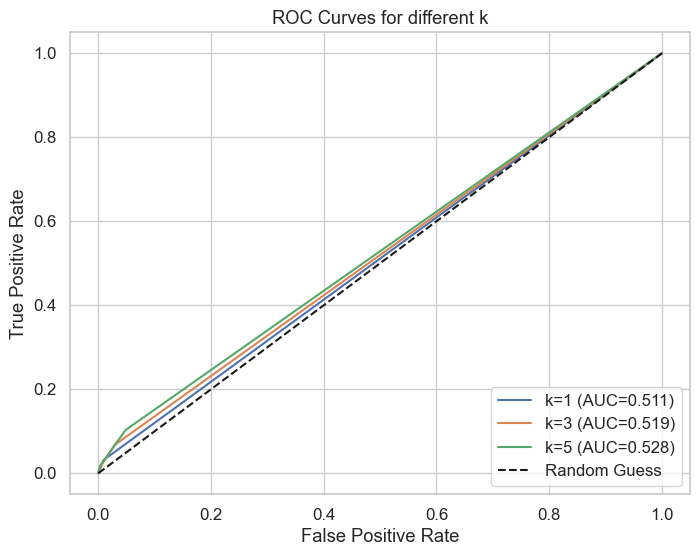

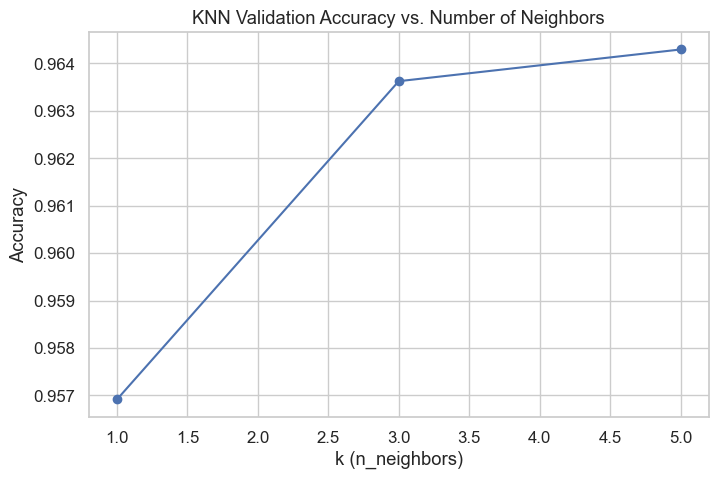

[0.9569123175398787, 0.9636265113286145, 0.9642953906593965]

In [18]:
# Evaluate KNN with different k values
k_range = range(1, 7, 2)
evaluate_knn(X_train, y_train, X_val, y_val, k_range)

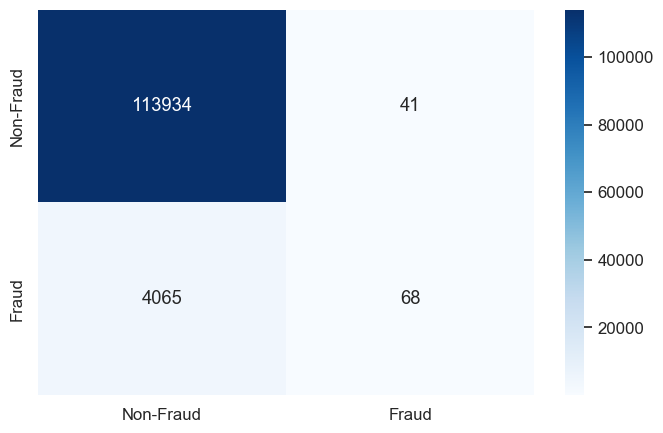

In [27]:
# [[113765    210]
#  [  4086     47]]

plot = sns.heatmap(
    confusion_matrix(y_val, y_pred),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Non-Fraud', 'Fraud'],
    yticklabels=['Non-Fraud', 'Fraud']
)

In [26]:
knn = KNeighborsClassifier(n_neighbors=51)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=51)

In [23]:
y_pred = knn.predict(X_val)

In [24]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.96523520845328
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    113975
           1       0.62      0.02      0.03      4133

    accuracy                           0.97    118108
   macro avg       0.79      0.51      0.51    118108
weighted avg       0.95      0.97      0.95    118108



In [25]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Confusion Matrix:
[[113934     41]
 [  4065     68]]
